<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_Python_new/blob/master/Regressione_NL_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Google Drive in Runtime Machine**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive




---



---


**Install Libraries**

In [2]:
!pip install --upgrade -q gspread
!pip install gspread-dataframe



---
---


**Import Libraries**

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 

#Python API for Google Sheets
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gs=gspread.authorize(GoogleCredentials.get_application_default())



---
---
**Load GoogleSheet data into a dataFrame and plot them**

,Superficie [mq],prezzo [euro]
count,121.000000,121.000000
mean,119.520661,120913.484591
std,34.204556,40957.817492
min,55.000000,20516.015512
25%,95.000000,97367.460307
50%,124.000000,125531.569465
75%,147.000000,149468.738664
max,175.000000,194341.740070


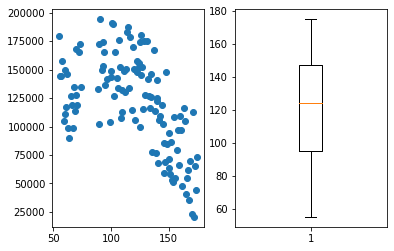

In [21]:
FILE_NAME='Regressione_NL_Decision_Tree_IN_2'
wks=gs.open(FILE_NAME).sheet1
INPUT_df=get_as_dataframe(wks)

#remove all NaN
INPUT_df=INPUT_df.dropna(1,'all')
INPUT_df=INPUT_df.dropna(0,'all')

#convert to NumPy array
#you can also use INPUT_DF.values
np_IN=np.array(INPUT_df)
np_IN_X=np_IN[:,0]
np_IN_Y=np_IN[:,1]

#plot data
fig, axs = plt.subplots(1,2)
axs[0].scatter(np_IN_X, np_IN_Y)
axs[1].boxplot(np_IN_X)

INPUT_df.describe()



---



---



In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#split dataset in training part and test part
# if train_size and test_size are not defined,the train_size=0.75 and test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_Y,test_size=0.25)

#reshape features to be used with LinearRegression's methods
X_train_r=np.reshape(X_train,(-1, 1))
X_test_r=np.reshape(X_test,(-1, 1))



---
---
Machine Learning
**ALGORITMO DI REGRESSIONE LINEARE**

TEST
R^2= 0.3682487501147911 
MSE= 1552446607.635712 

TRAIN
R^2= 0.27105078012180617 
MSE= 1013071402.313694 



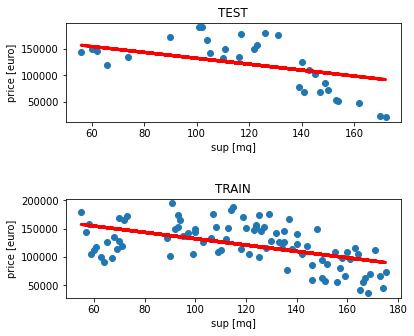

In [10]:

#train the linear regressor
reg = LinearRegression().fit(X_train_r, y_train)

#y_pred is a linear prediction of X_test
y_pred_test=reg.predict(X_test_r)
y_pred_train=reg.predict(X_train_r)

#evaluate the model by using R=1-RSE and MSE
R2=reg.score(X_test_r,y_test)
MSE = mean_squared_error( y_test,y_pred_test)
R2_train=reg.score(X_train_r,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

#show the solution
fig, axs = plt.subplots(2,1)

pos0=axs[0].get_position()
pos0_new=[pos0.x0,pos0.y0+0.2,pos0.width,pos0.height]
axs[0].set_position(pos0_new)
axs[0].set_xlabel('sup [mq]')
axs[0].set_ylabel('price [euro]')
axs[0].set_title('TEST')
axs[0].scatter(X_test,y_test)
axs[0].plot(X_test,y_pred_test,c='red',linewidth=3)

axs[1].set_title('TRAIN')
axs[1].set_xlabel('sup [mq]')
axs[1].set_ylabel('price [euro]')
axs[1].scatter(X_train,y_train)
axs[1].plot(X_train,y_pred_train,c='red',linewidth=3)


---
---
Machine Learning
**ALGORITMO DI REGRESSIONE POLINOMIALE**

TEST
R^2= 0.692626066501918 
MSE= 602845481.596859 

TRAIN
R^2= 0.49308973012897106 
MSE= 791373404.133067 



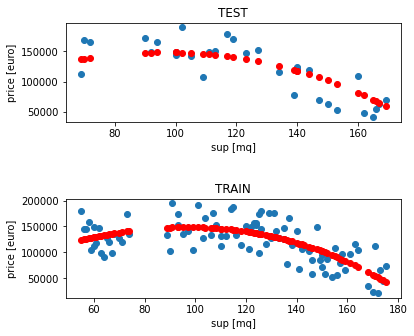

In [37]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train_r)
X_poly_test = poly_reg.fit_transform(X_test_r)

#train the Linear Regression with trandformed 'polinomially' features
pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

#y_pred_xxx is a prediction of X_poly_xxx
y_pred_test=pol_reg.predict(X_poly_test)
y_pred_train=pol_reg.predict(X_poly_train)


#evaluate the model by using R=1-RSE and MSE
R2=pol_reg.score(X_poly_test,y_test)
MSE = mean_squared_error( y_test,y_pred_test)
R2_train=pol_reg.score(X_poly_train,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

#show the solution
fig, axs = plt.subplots(2,1)

pos0=axs[0].get_position()
pos0_new=[pos0.x0,pos0.y0+0.2,pos0.width,pos0.height]
axs[0].set_position(pos0_new)
axs[0].set_xlabel('sup [mq]')
axs[0].set_ylabel('price [euro]')
axs[0].set_title('TEST')
axs[0].scatter(X_test,y_test)
axs[0].scatter(X_test,y_pred_test,c='red',linewidth=1)

axs[1].set_title('TRAIN')
axs[1].set_xlabel('sup [mq]')
axs[1].set_ylabel('price [euro]')
axs[1].scatter(X_train,y_train)
axs[1].scatter(X_train,y_pred_train,c='red',linewidth=1)

Machine Learning
**ALGORITMO DI REGRESSIONE DECISION TREE**

TEST
R^2= 0.636915244708911 
MSE= 892233607.354657 

TRAIN
R^2= 0.5975584490683936 
MSE= 559300998.250202 



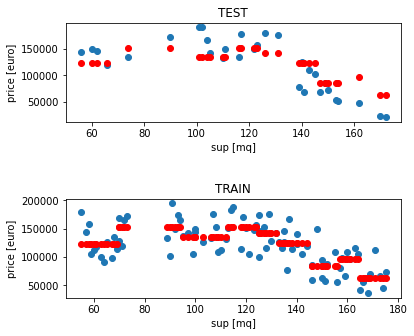

In [19]:
# import library
from sklearn.tree import DecisionTreeRegressor

#create an istance of DT regressor
#max_depth: max number of levels
#min_samples_leaf: ceil(min_samples_leaf * n_samples) are the minimum number of 
#samples for each node-> level of 'smoothing' of the model
dtree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=0.07)

#train DT on traingin set
dtree.fit(X_train_r, y_train)

#y_pred_xxx is a prediction of X_xxx
y_pred_test=dtree.predict(X_test_r)
y_pred_train=dtree.predict(X_train_r)

#evaluate the model by using R=1-RSE and MSE
R2=dtree.score(X_test_r,y_test)
MSE = mean_squared_error(y_test,y_pred_test)
R2_train=dtree.score(X_train_r,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

#show the solution
fig, axs = plt.subplots(2,1)

pos0=axs[0].get_position()
pos0_new=[pos0.x0,pos0.y0+0.2,pos0.width,pos0.height]
axs[0].set_position(pos0_new)
axs[0].set_xlabel('sup [mq]')
axs[0].set_ylabel('price [euro]')
axs[0].set_title('TEST')
axs[0].scatter(X_test,y_test)
axs[0].scatter(X_test,y_pred_test,c='red',linewidth=1)

axs[1].set_title('TRAIN')
axs[1].set_xlabel('sup [mq]')
axs[1].set_ylabel('price [euro]')
axs[1].scatter(X_train,y_train)
axs[1].scatter(X_train,y_pred_train,c='red',linewidth=1)